In [1]:
import pandas as pd
pd.options.display.max_columns = None # 显示所有列

In [2]:
# Read .csv
data = pd.read_csv('data.csv')
data

,malignant,bilateral,age,month,bmi,diabetes,hypertension,surgery,smoking,family,menarche,menopause,miscarriage,pregnancy,childbearing,nd_blood,nd_milk,nd_serous,nd_change,nd_number,nd_mass,nd_position,nd_distance,nd_shape,nd_surface,nd_dispersion,nd_quantity,nd_distribution,nd_retraction,nd_appearance,us_ductectasia,us_intramass,us_cysmass,us_mass,us_size,us_position,us_distance,us_shape,us_boundary,us_bloodflow,us_calcification,us_birads,xray
0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,0,0,0
1,1,1,1,1,1,0,1,1,0,0,1,0,2,2,1,0,0,1,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,0,0,0
2,1,0,2,0,2,0,0,0,1,0,1,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,0,1,0
3,1,0,1,1,2,0,0,0,0,0,1,0,1,2,1,1,0,0,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,2,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,2,1,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,4,1,1,1,2,1,1,0,0,1,1,2,2,3,4,1,1,2,1,0,1,0
351,0,1,1,0,2,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,2,1,1,2,1,0,1,0
352,0,1,1,0,2,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,2,2,1,1,2,1,1,0,0,0,0,1,2,2,1,1,1,1,1,0,0,0
353,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,1,1,1,1,1,2,1,1,0,0,1,2,0,2,1,5,1,1,1,1,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   malignant         355 non-null    int64
 1   bilateral         355 non-null    int64
 2   age               355 non-null    int64
 3   month             355 non-null    int64
 4   bmi               355 non-null    int64
 5   diabetes          355 non-null    int64
 6   hypertension      355 non-null    int64
 7   surgery           355 non-null    int64
 8   smoking           355 non-null    int64
 9   family            355 non-null    int64
 10  menarche          355 non-null    int64
 11  menopause         355 non-null    int64
 12  miscarriage       355 non-null    int64
 13  pregnancy         355 non-null    int64
 14  childbearing      355 non-null    int64
 15  nd_blood          355 non-null    int64
 16  nd_milk           355 non-null    int64
 17  nd_serous         355 non-null    i

In [4]:
from pycaret.classification import *
model = setup(data=data, target = 'malignant', train_size=0.85, session_id=42)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(355, 43)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,42
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.817000,0.830300,0.515300,0.704200,0.589400,0.479100
1,Extreme Gradient Boosting,0.813800,0.823100,0.493100,0.725400,0.580100,0.468300
2,Light Gradient Boosting Machine,0.813800,0.831700,0.543100,0.726400,0.613600,0.494700
3,Random Forest Classifier,0.810600,0.818000,0.429200,0.790000,0.532200,0.432300
4,Ridge Classifier,0.807400,0.000000,0.419400,0.775000,0.530900,0.425600
5,Extra Trees Classifier,0.807400,0.814700,0.468100,0.750200,0.546200,0.439600
6,Linear Discriminant Analysis,0.807300,0.792700,0.443100,0.738800,0.538500,0.430900
7,Gradient Boosting Classifier,0.804000,0.832400,0.531900,0.674400,0.585800,0.462200
8,Logistic Regression,0.800600,0.804300,0.455600,0.707900,0.546900,0.427800
9,Ada Boost Classifier,0.794200,0.808000,0.456900,0.709800,0.536100,0.414000


In [6]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7742,0.8258,0.5556,0.6250,0.5882,0.4334
1,0.7000,0.7045,0.1250,0.3333,0.1818,0.0426
2,0.8333,0.8750,0.3750,1.0000,0.5455,0.4681
3,0.8667,0.8778,0.6250,0.8333,0.7143,0.6296
4,0.7667,0.8523,0.5000,0.5714,0.5333,0.3787
5,0.8000,0.7756,0.6250,0.6250,0.6250,0.4886
6,0.8333,0.8636,0.5000,0.8000,0.6154,0.5161
7,0.9000,0.8040,0.6250,1.0000,0.7692,0.7097
8,0.8333,0.8011,0.6250,0.7143,0.6667,0.5562
9,0.7667,0.7670,0.1250,1.0000,0.2222,0.1732


In [7]:
tuned_et = tune_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8065,0.9141,0.6667,0.6667,0.6667,0.5303
1,0.7333,0.6989,0.1250,0.5000,0.2000,0.1045
2,0.8000,0.8580,0.3750,0.7500,0.5000,0.3919
3,0.8000,0.8864,0.2500,1.0000,0.4000,0.3284
4,0.7667,0.8636,0.5000,0.5714,0.5333,0.3787
5,0.8333,0.9034,0.5000,0.8000,0.6154,0.5161
6,0.8000,0.8580,0.2500,1.0000,0.4000,0.3284
7,0.9000,0.7955,0.6250,1.0000,0.7692,0.7097
8,0.8333,0.8977,0.5000,0.8000,0.6154,0.5161
9,0.7667,0.7670,0.1250,1.0000,0.2222,0.1732


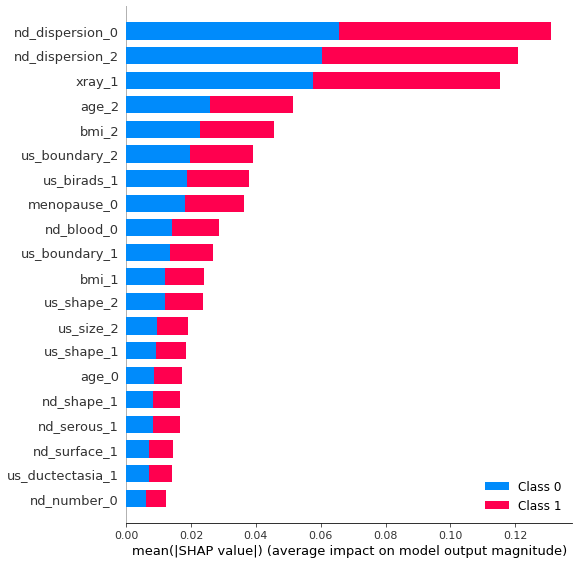

In [8]:
interpret_model(et)

In [9]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [10]:
pred_holdout = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.7963,0.8692,0.6,0.6429,0.6207,0.4817


In [11]:
data.columns

Index(['malignant', 'bilateral', 'age', 'month', 'bmi', 'diabetes',
       'hypertension', 'surgery', 'smoking', 'family', 'menarche', 'menopause',
       'miscarriage', 'pregnancy', 'childbearing', 'nd_blood', 'nd_milk',
       'nd_serous', 'nd_change', 'nd_number', 'nd_mass', 'nd_position',
       'nd_distance', 'nd_shape', 'nd_surface', 'nd_dispersion', 'nd_quantity',
       'nd_distribution', 'nd_retraction', 'nd_appearance', 'us_ductectasia',
       'us_intramass', 'us_cysmass', 'us_mass', 'us_size', 'us_position',
       'us_distance', 'us_shape', 'us_boundary', 'us_bloodflow',
       'us_calcification', 'us_birads', 'xray'],
      dtype='object')

In [12]:
kerasdata = pd.DataFrame()

kerasdata['malignant'] = data['malignant']
    
kerasdata[['bilateral','diabetes','hypertension']] = data[['bilateral','diabetes','hypertension']]

kerasdata[['surgery', 'smoking', 'family','menopause']] = data[['surgery', 'smoking', 'family','menopause']]
                              
kerasdata[['nd_change', 'nd_number','nd_mass','nd_distance','us_ductectasia','us_calcification','xray']] = data[['nd_change', 'nd_number','nd_mass','nd_distance','us_ductectasia','us_calcification','xray']]
                              
kerasdata[['nd_blood', 'nd_milk', 'nd_serous']] = data[['nd_blood', 'nd_milk', 'nd_serous']]

classname = ['bmi','menarche','miscarriage','pregnancy','childbearing', 'nd_position',  'nd_shape', 'nd_surface', 'nd_dispersion', 'nd_quantity',  'nd_appearance', 'us_intramass', 'us_cysmass', 
             'us_mass', 'us_size', 'us_position', 'us_distance', 'us_shape', 'us_boundary', 'us_bloodflow', 'birads']

In [13]:
for colname in data.columns:
    if colname not in classname:
        df = pd.get_dummies(data[colname])
        df.columns = [colname + '-' + str(name) for name in df.columns ]
        kerasdata = pd.concat([kerasdata,df],axis = 1)
kerasdata

,malignant,bilateral,diabetes,hypertension,surgery,smoking,family,menopause,nd_change,nd_number,...,nd_retraction-0,nd_retraction-1,us_ductectasia-0,us_ductectasia-1,us_calcification-0,us_calcification-1,us_birads-0,us_birads-1,xray-0,xray-1
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
1,1,1,0,1,1,0,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
2,1,0,0,0,0,1,0,1,0,0,...,1,0,0,1,1,0,0,1,1,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
4,1,0,1,1,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,1,0
351,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,1,0
352,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
353,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 42
testsize = 0.2
kfold = StratifiedKFold(n_splits=10, random_state =seed, shuffle=True)
X, y = kerasdata.values[:,1:], kerasdata.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=seed)

In [15]:
X_train.shape

(284, 66)

In [16]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(60,activation = 'relu',input_shape=(115,)))
model.add(layers.Dense(60,activation = 'relu' ))
# model.add(layers.Dense(30,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                6960      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 10,681
Trainable params: 10,681
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train,y_train,
                    batch_size= 64,
                    epochs= 50,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

ValueError: Error when checking input: expected dense_1_input to have shape (115,) but got array with shape (66,)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,0], figsize=(12,6));